In [89]:
library(dslabs)
library(tidyverse)
library(gridExtra)
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

# Know when to include zero?

When using position (e.g scatter plot) rather than length (e.g: the height of each bar in bar plot), then it is not necessary to include 0
This is particularly the case when we want to compare differences between groups relative to the variability seen within the groups

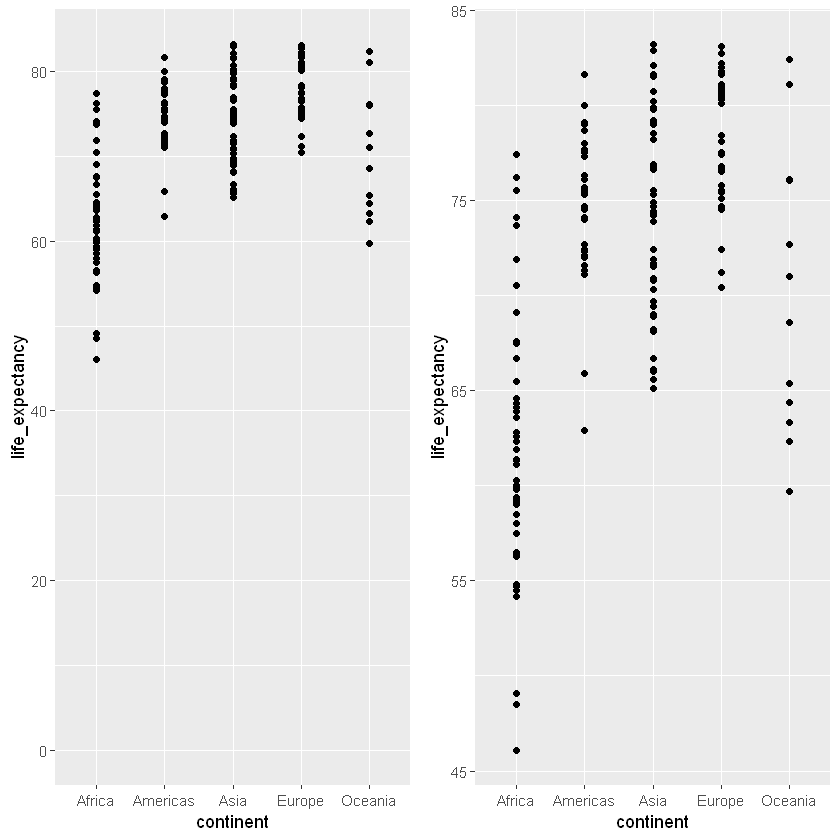

In [15]:
plot2 <- gapminder %>% 
filter(year == 2012) %>%
ggplot(aes(continent, life_expectancy)) +
geom_point()

plot1 <- plot2 +
coord_cartesian(ylim = c(0, NA))


grid.arrange(plot1, plot2, ncol = 2)

Here's an illustrative example showing country average life expectancies,
stratified into continents, in 2012.
In the plot on the left, which includes 0, the space between 0 and 43
adds no information, and makes it harder to appreciate
the between and within variability.
For this reason, on the plot on the right,
we restrict the range to only include the points.

# Order by meaningful value

When one of the axes is used to show categories, as done bar plots,
the default ggplot behavior is to order the categories alphabetically
when they are defined by character strings.
If they are defined by factors, they are ordered by the factor levels.
But remember, factor levels default to ordering by alphabetical order.
We rarely want to use alphabetical order.

It is easiest to visually extract information from a plot when categories are ordered by a meaningful value. The exact value on which to order will depend on your data and the message you wish to convey with your plot.
The default ordering for categories is alphabetical if the categories are strings or by factor level if factors. However, we rarely want alphabetical order.

In [16]:
head(murders)

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


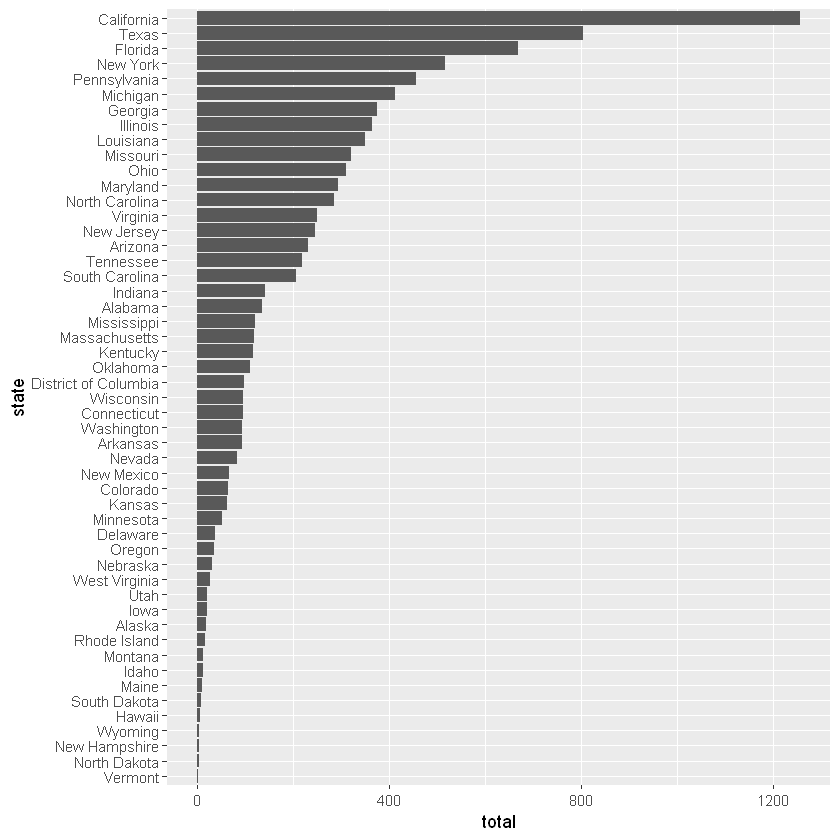

In [19]:
murders %>%
mutate(state = reorder(state, total)) %>%
ggplot(aes(y = state, x = total)) + 
geom_col()

# Show the data

A dynamite plot - a bar graph of group averages with error bars denoting standard errors - provides almost no information about a distribution.

In [20]:
head(heights)

sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


`summarise()` ungrouping output (override with `.groups` argument)


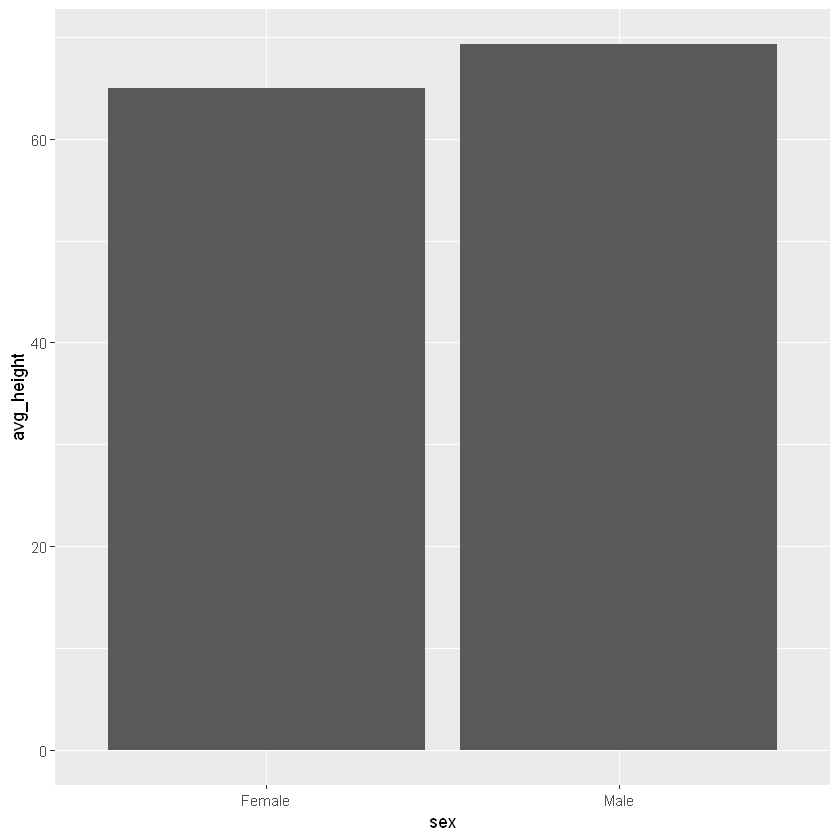

In [25]:
heights %>%
group_by(sex) %>%
summarize(avg_height = mean(height)) %>%
ggplot(aes(sex, avg_height)) + geom_col()

By showing the data, you provide viewers extra information about distributions.

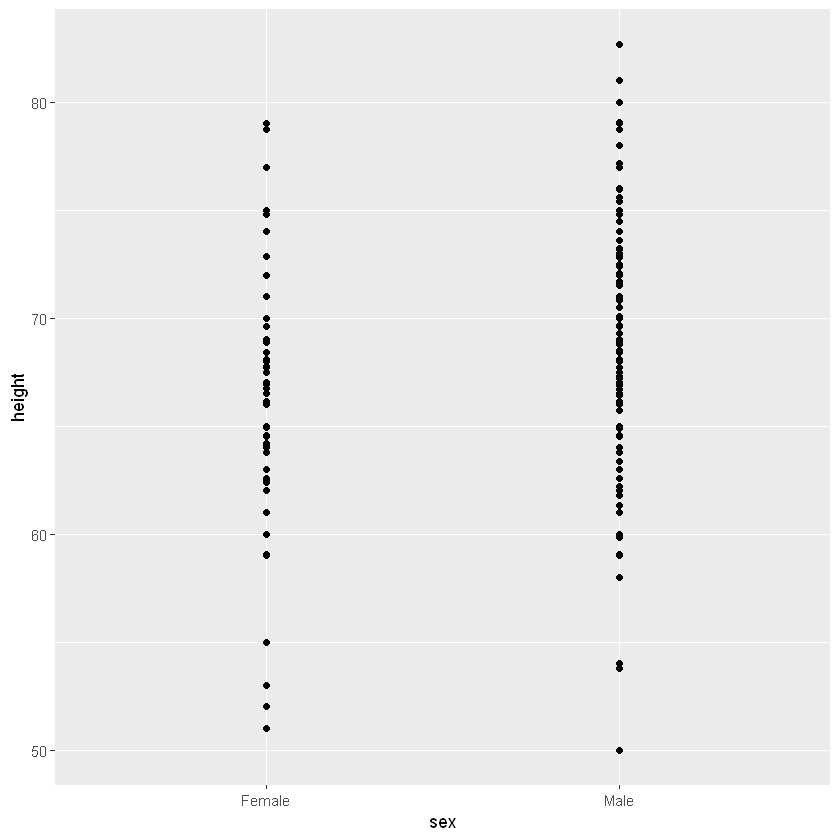

In [28]:
heights %>%
ggplot(aes(sex, height)) + 
geom_point()

There are so manny overlapping point. Handle by using:
* Jitter
* Alpha blending

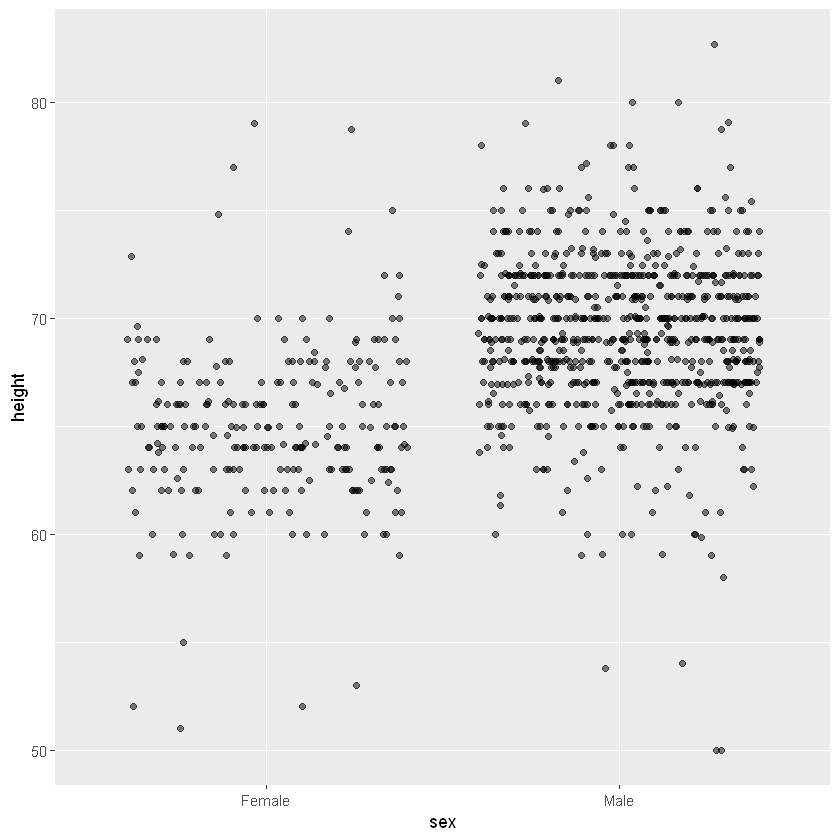

In [32]:
heights %>%
ggplot(aes(sex, height)) + 
geom_jitter(alpha = .5)

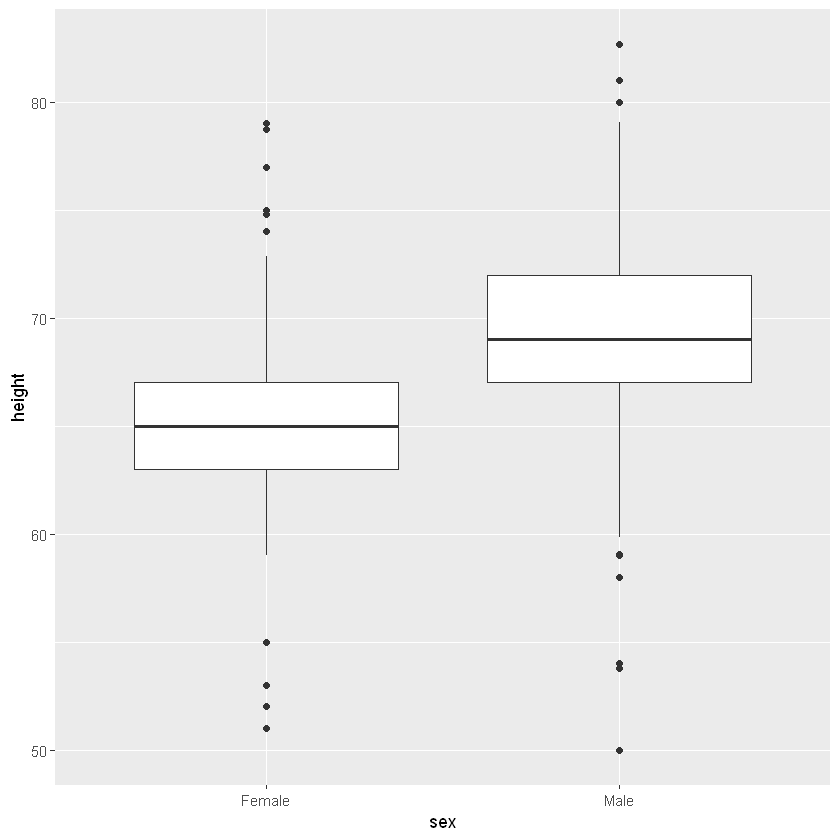

In [27]:
heights %>%
ggplot(aes(sex, height)) + geom_boxplot()

# Comparing data scross plots

### Keep the axes the same

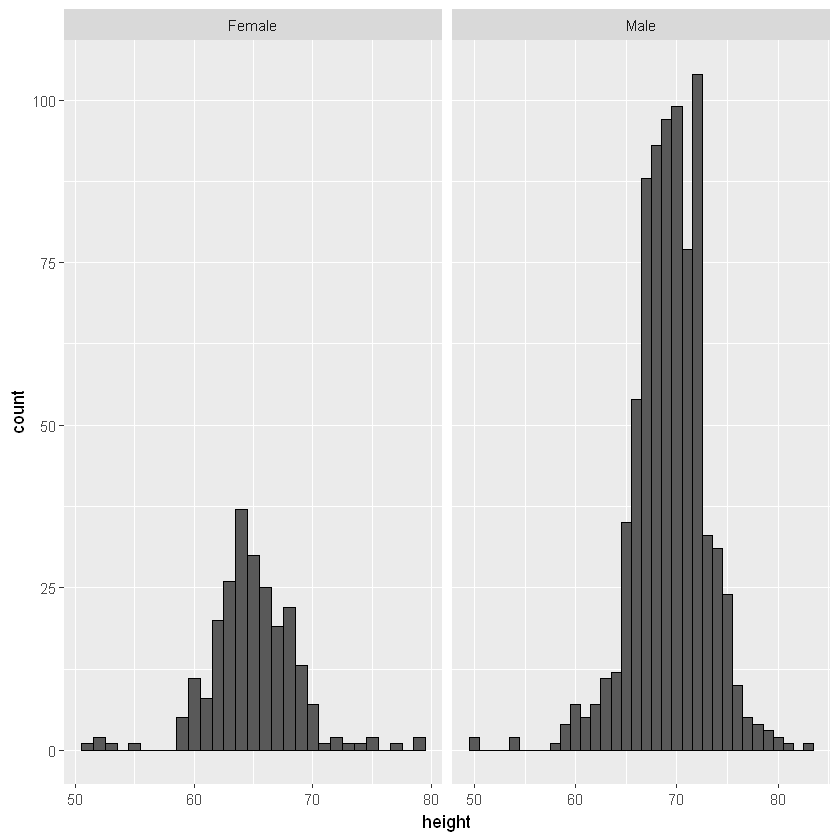

In [37]:
heights %>%
ggplot(aes(height)) +
geom_histogram(binwidth = 1, color = 'black') + 
facet_grid(. ~ sex, scales = 'free_x')

Notice that the x-axis of the right facet has higher range then the one on the right (i.e: left facet has xlim = c(50, 80), right facet has xlim = c(50, a value larger than 80))  
The comparasion will become easier when we keep the axes the same

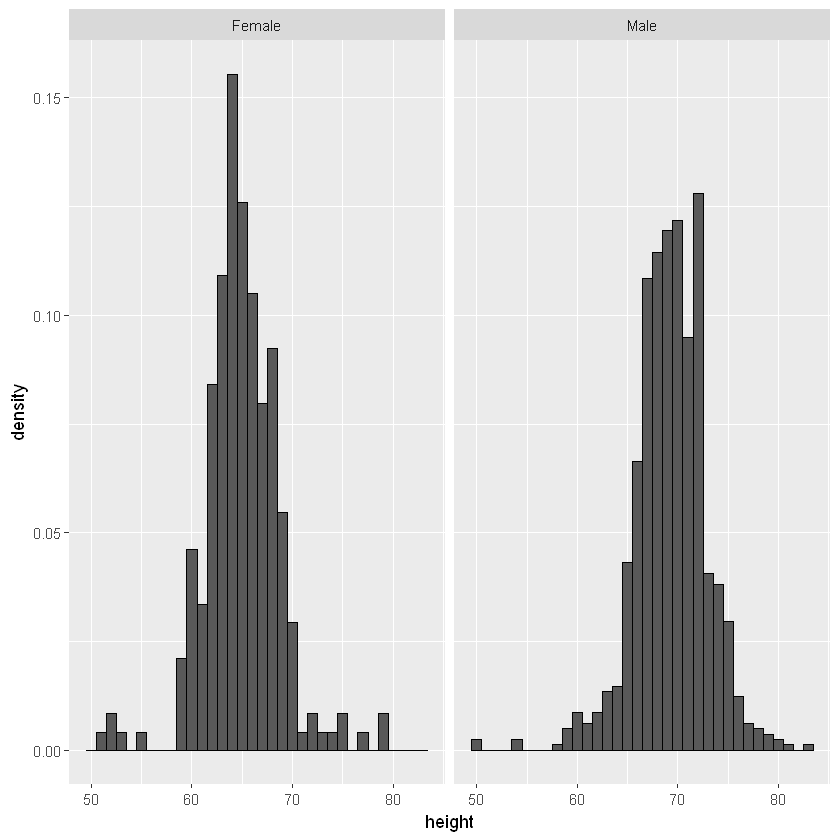

In [49]:
heights %>%
ggplot(aes(height)) + 
geom_histogram(aes(y = ..density..), binwidth = 1, color = 'black') + 
facet_grid(. ~ sex)

### Align plots vertical to see horizontal changes, and horizontally to see vertical changes.

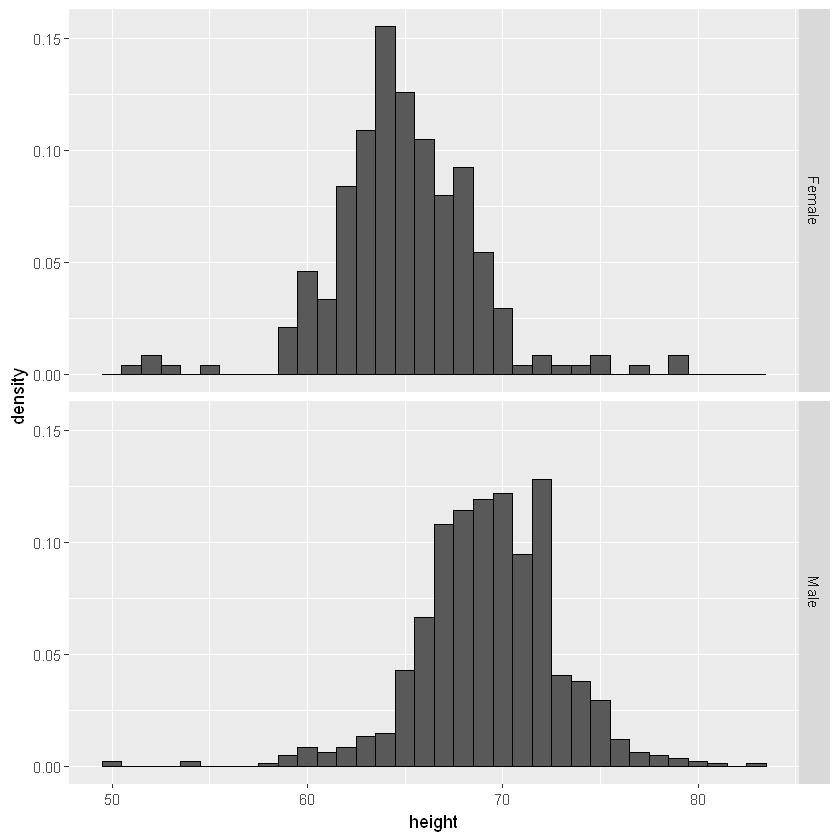

In [51]:
heights %>% 
ggplot(aes(height)) + 
geom_histogram(aes(y = ..density..), binwidth = 1, color = 'black') + 
facet_grid(sex ~ .)

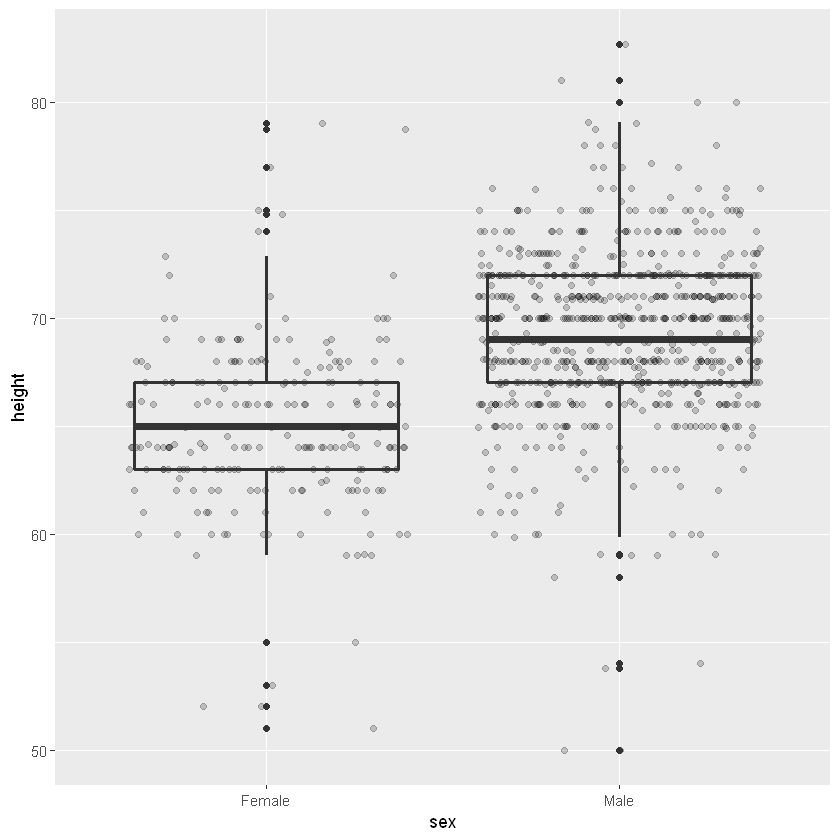

In [56]:
heights %>%
ggplot(aes(sex, height)) + 
geom_jitter(alpha = .2) +
geom_boxplot(fill = NA, size = 1)

# Consider Transformation

Consider this bar plot showing the average population sizes
for each continent in 2015.

In [57]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


`summarise()` ungrouping output (override with `.groups` argument)


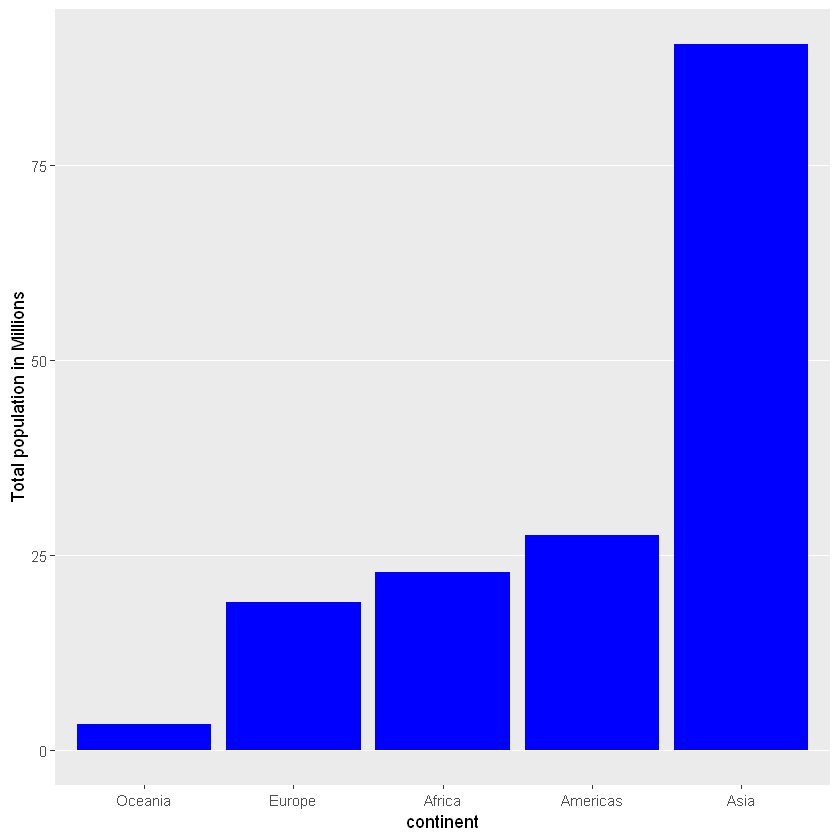

In [120]:
bar_plot <- gapminder %>%
filter(year == 2015) %>% 
group_by(continent) %>%
summarize(pop = mean(population) / 1000000) %>%
mutate(continent = reorder(continent, pop)) %>%
ggplot(aes(continent, pop)) + 
geom_col(fill = 'blue') +
labs(y = 'Total population in Millions') +
theme(panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.minor.y = element_blank())

bar_plot

From this plot, one would conclude that coutries in Asia are much more pupolous than other continents.  
Follow a quick show-the-data principle, we quickly notice that this is due to two very large countries, which we assume are Indian and China. We can see those 2 points way up there.

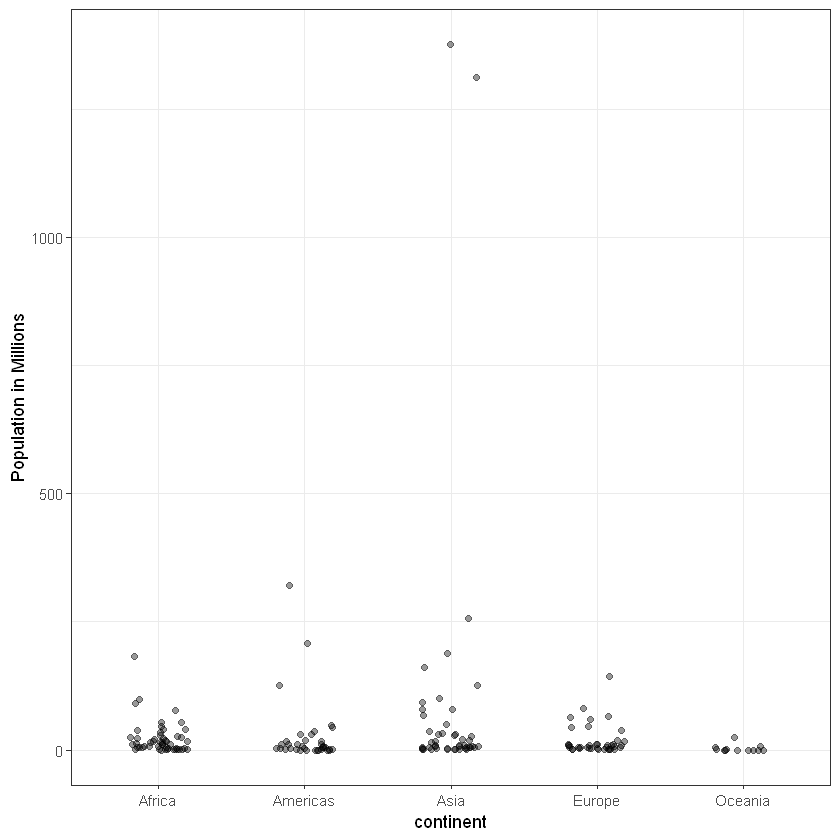

In [119]:
gapminder %>%
filter(year == 2015) %>% 
mutate(population = population / 1e6) %>%
ggplot(aes(continent, population)) +
geom_jitter(alpha = .4, width = .2)  +
labs(y = 'Population in Millions') +
theme_bw()

Using a log scale plot provides a much more informative plot

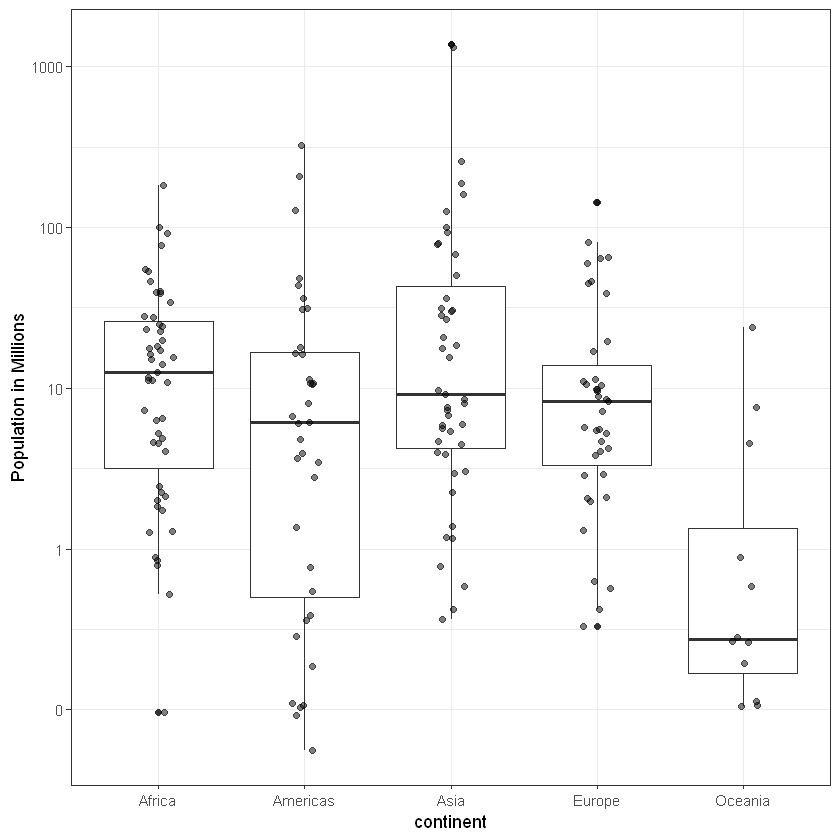

In [140]:
#Using log 10 scale on the y axis
box_plot <- gapminder %>%
filter(year == 2015) %>% 
mutate(population = population / 1e6) %>%
ggplot(aes(continent, population)) + 
geom_boxplot() + 
geom_jitter(width = .1, alpha = .5) + 
scale_y_log10(labels = function(value) as.integer(value)) +
labs(y = 'Population in Millions') +
theme_bw()

box_plot

we compare origin bar plot a box plot

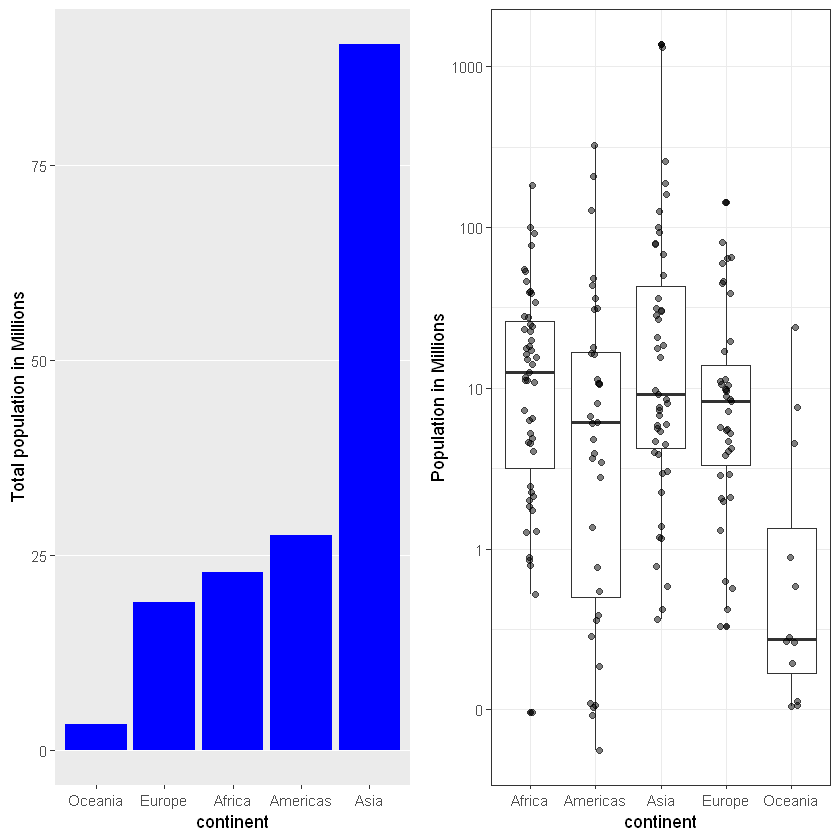

In [141]:
grid.arrange(bar_plot, box_plot, ncol = 2)

Note how much more informative that box plot is over the bar plot.
In fact, we see that Africa has a higher median population size than Asia.

### Conclusion

Use transformations when warranted to ease visual interpretation.  
E.g: Using log10 scale, 1 encreasing unit in the axis corresponds to 10 times that value increases.

 <b style = 'color:red'>Transformations you should consider are:
* The `logistic transformation`: useful to better see fold changes in odds
* The `square root transformation`, useful for count data.
* the `log transformation` is useful for data with multiplicative changes


# Ease Comparisons: Compared Visual Cues Should Be Adjacent

When 2 groups are to be compared, it is optimal to place them adjacent in the plot

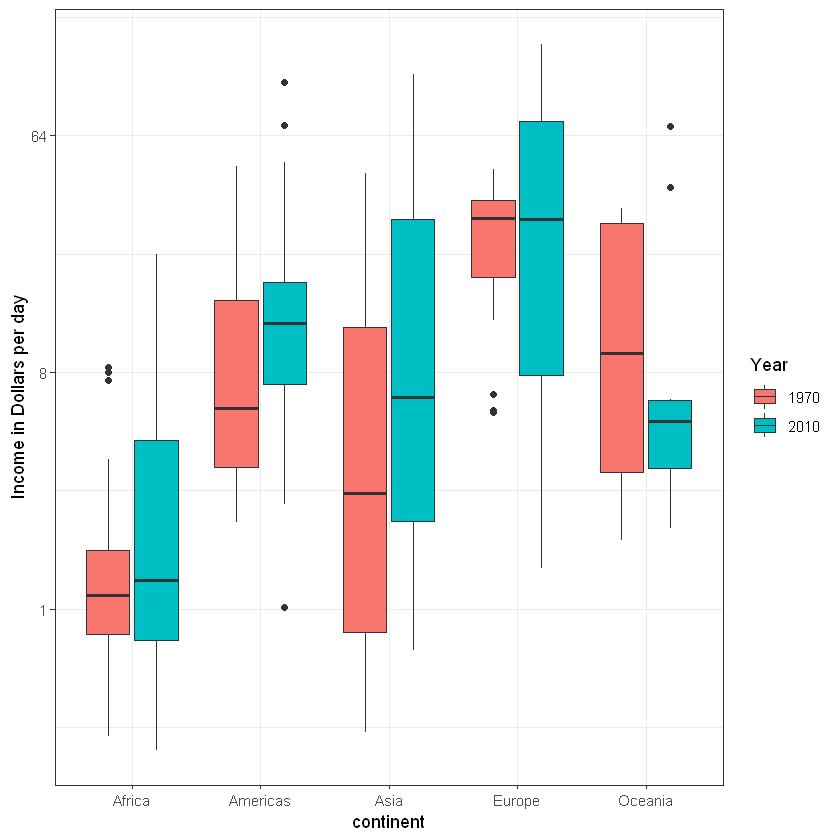

In [152]:
#Comparing income data between 1970 and 2010, across regions
gapminder %>%
filter(year %in% c(1970, 2010) & !is.na(gdp)) %>%
mutate(dollars_per_day = gdp / population / 365) %>%
ggplot(aes(continent, dollars_per_day, fill = factor(year))) +
geom_boxplot() + 
#log 2 scale on the y axis 
scale_y_continuous(trans = 'log2') +
labs(y = 'Income in Dollars per day') +
#Set the legend title to Year
scale_fill_discrete(name = 'Year') + 
theme_bw()

# Slope Chart

In [2]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


Comparing life expectancy between 2010 and 2015

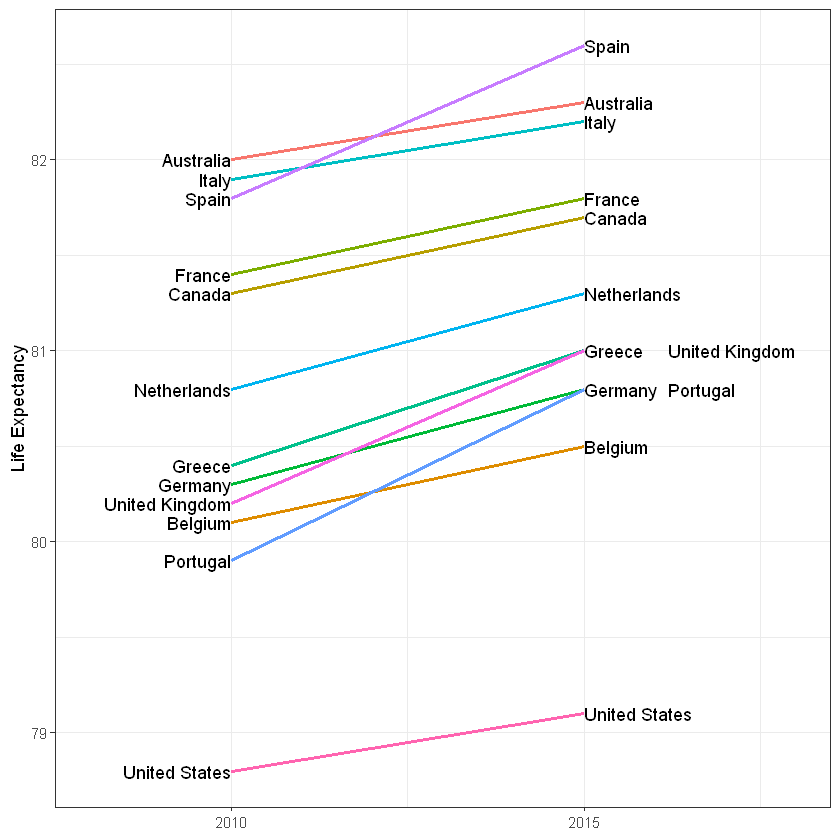

In [63]:
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

gapminder %>%
filter(year %in% c(2010, 2015) & region %in% west & population > 1e7 & !is.na(life_expectancy)) %>%
ggplot(aes(year, life_expectancy)) + 
geom_line(aes(color = country), show.legend = FALSE, size =  1) + 
geom_text(aes(ifelse(country %in% c('United Kingdom', 'Portugal') & year == 2015, year + 1.2, year), label = country, hjust = ifelse(year == 2010, 1, 0))) +
scale_x_continuous(breaks = c(2010, 2015)) + 
labs(x = NULL, y = 'Life Expectancy') + 
expand_limits(x = c(2008, 2018)) +
theme_bw()

An advantage of the slope chart is that it
permits us to quickly get an idea of changes
based on the slope of the lines.
Note, that we're using angle as a visual cue,
but we also have position to determine the exact values.

Now, note that when we have many points, the slope charge
stops being useful because it becomes too cluttered, and in this case,
we would use a scatterplot.

# Bland-Altman plot

Show the difference versus the average

In [74]:
df <- gapminder %>%
filter(year %in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7) %>%
mutate(year = paste0('year_', year)) %>%
select(country, year, life_expectancy) %>% spread(year, life_expectancy) %>%
mutate(average = (year_2010 + year_2015) / 2, difference = year_2015 - year_2010) 

df

country,year_2010,year_2015,average,difference
Australia,82.0,82.3,82.15,0.3
Belgium,80.1,80.5,80.30,0.4
Canada,81.3,81.7,81.50,0.4
France,81.4,81.8,81.60,0.4
Germany,80.3,80.8,80.55,0.5
Greece,80.4,81.0,80.70,0.6
Italy,81.9,82.2,82.05,0.3
Netherlands,80.8,81.3,81.05,0.5
Portugal,79.9,80.8,80.35,0.9
Spain,81.8,82.6,82.20,0.8


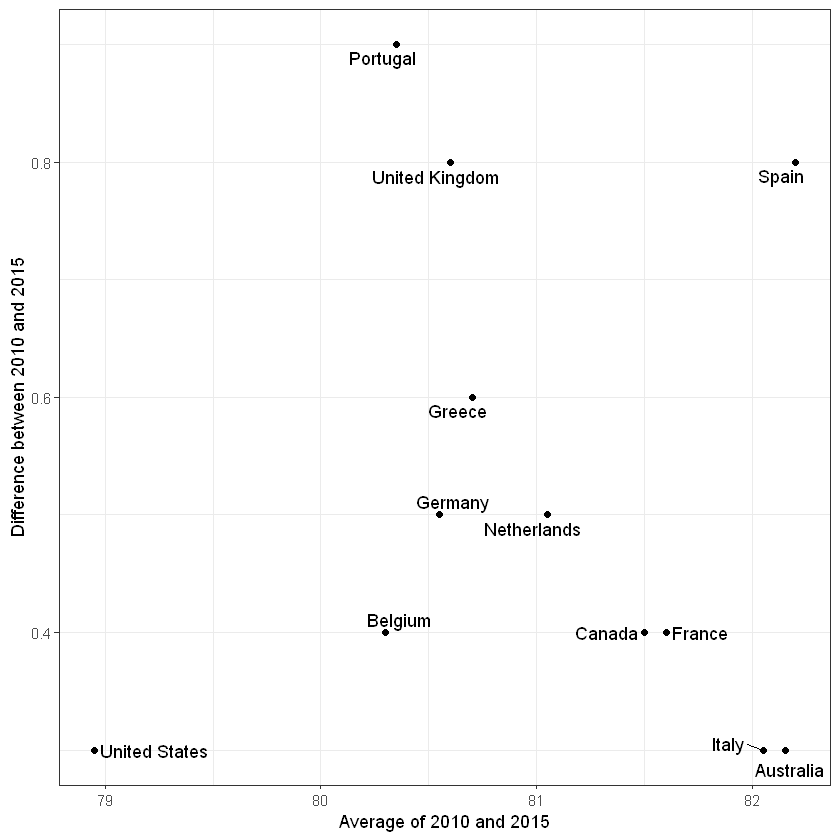

In [90]:
df %>%
ggplot(aes(average, difference)) + 
geom_point() +
geom_text_repel(aes(label = country)) + 
xlab('Average of 2010 and 2015') + 
ylab('Difference between 2010 and 2015') +
theme_bw()

Here we quickly see which countries have improved the most
as it's represented in the y-axis.  
We also get an idea of the overall value from the x-axis.


# Encoding a Third Variable

* Encode a categorical third variable on a scatterplot using color hue or shape. Use the shape argument to control shape.  
* Encode a continuous third variable on a using color intensity or size.

# Avoid Too Many Significant Digits

In tables, avoid using too many significant digits. Too many digits can distract from the meaning of your data.

Reduce the number of significant digits globally by setting an option. For example, **`options(digits = 3)`** will cause all future computations that session to have 3 significant digits.